In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [39]:
#Reads in Raw csv Data for NBA Players
df=pd.read_csv(r'data-files/Seasons_Stats.csv')

In [40]:
#Cleaning Raw NBA Data
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop(['blanl','blank2'],inplace=True,axis=1)
df['FTM']=df['FTA']-df['FT']
df=df.dropna()
df['Player']=df['Player'].apply(lambda player: player[:-1] if player[-1]=='*' else player[:])

In [41]:
#Creating DataFrame Based on Valuble Statistics for Fantasy Basketball League
Fantasy_Stats=df[['Year', 'Player', 'Pos','PTS','AST','TRB','BLK','STL','TOV','3P','FT','FTM']]
Fantasy_Stats=Fantasy_Stats[Fantasy_Stats['Year']>1989.0]

In [42]:
#Imports Triple Double and Double Double Data that was scraped from web 
Triple_Doubles = pd.read_excel(r'data-files/TD.xlsx', sheetname='Sheet1')
Double_Doubles=pd.read_excel(r'data-files/DD.xlsx', sheetname='Sheet1')
Triple_Doubles.head()
Double_Doubles.head()

/home/addybrown/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Player,Year,DD
0,Hakeem Olajuwon,1990,68
1,John Stockton,1990,64
2,David Robinson,1990,59
3,Magic Johnson,1990,55
4,Charles Barkley,1990,52


In [43]:
#Creates Fantasy Data DataFrame, cleans the data as well 
Fantasy_Data=pd.merge(Fantasy_Stats, Triple_Doubles,right_on=['Player','Year'],left_on=['Player','Year'], how='left')
Fantasy_Data=pd.merge(Fantasy_Data, Double_Doubles,right_on=['Player','Year'],left_on=['Player','Year'], how='left')
Fantasy_Data=Fantasy_Data.replace(np.NaN,0)
Fantasy_Data.head()

,Year,Player,Pos,PTS,AST,TRB,BLK,STL,TOV,3P,FT,FTM,TD,DD
0,1990.0,Mark Acres,C,362.0,67.0,431.0,25.0,36.0,70.0,3.0,83.0,37.0,0.0,5.0
1,1990.0,Michael Adams,PG,1221.0,495.0,225.0,3.0,121.0,141.0,158.0,267.0,47.0,0.0,11.0
2,1990.0,Mark Aguirre,SF,1099.0,145.0,305.0,19.0,34.0,121.0,31.0,192.0,62.0,0.0,0.0
3,1990.0,Danny Ainge,PG,1342.0,453.0,326.0,18.0,113.0,185.0,108.0,222.0,45.0,1.0,8.0
4,1990.0,Mark Alarie,PF,860.0,142.0,374.0,39.0,60.0,101.0,10.0,108.0,25.0,0.0,3.0


In [46]:
#Creates Fantasy Table Based on Fantasy League Criteria 
Fantasy_Data['Fantasy_Pts']=Fantasy_Data['PTS']+1.5*Fantasy_Data['AST']+Fantasy_Data['TRB']+2.5*Fantasy_Data['BLK']\
+2.5*Fantasy_Data['STL']-1.5*Fantasy_Data['TOV']+Fantasy_Data['3P']+0.5*Fantasy_Data['FT']-0.75*Fantasy_Data['FTM']+\
3*Fantasy_Data['TD']+Fantasy_Data['DD']
Fantasy_Data.head()

,Year,Player,Pos,PTS,AST,TRB,BLK,STL,TOV,3P,FT,FTM,TD,DD,Fantasy_Pts
0,1990.0,Mark Acres,C,362.0,67.0,431.0,25.0,36.0,70.0,3.0,83.0,37.0,0.0,5.0,962.75
1,1990.0,Michael Adams,PG,1221.0,495.0,225.0,3.0,121.0,141.0,158.0,267.0,47.0,0.0,11.0,2554.25
2,1990.0,Mark Aguirre,SF,1099.0,145.0,305.0,19.0,34.0,121.0,31.0,192.0,62.0,0.0,0.0,1653.00
3,1990.0,Danny Ainge,PG,1342.0,453.0,326.0,18.0,113.0,185.0,108.0,222.0,45.0,1.0,8.0,2593.75
4,1990.0,Mark Alarie,PF,860.0,142.0,374.0,39.0,60.0,101.0,10.0,108.0,25.0,0.0,3.0,1591.25


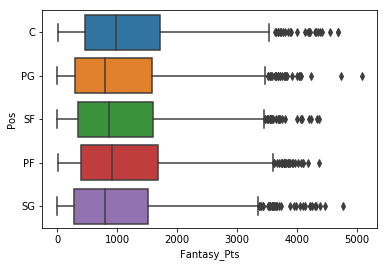

In [48]:
#Creates Boxplot to visually see which position generates on average the most fantasy point
sns.boxplot(x=Fantasy_Data['Fantasy_Pts'],y=Fantasy_Data['Pos'].\
            apply(lambda pos: re.search('(.*)-', pos).group(1) if '-' in pos else pos))

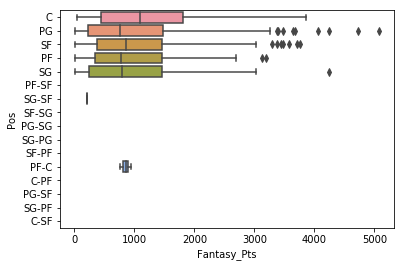

In [49]:
#Looks at Data Since 2015
sns.boxplot(x=Fantasy_Data['Fantasy_Pts'][Fantasy_Data['Year']>2015.0],y=Fantasy_Data['Pos'])

In [50]:
#Another valuable analysis would be to look at how experience plays a roll in Fantasy Points

#This provides a DataFrame of the players who played in 1990 so the number of years played before the year can be counted 
player_1990=Fantasy_Data[Fantasy_Data['Year']==1990.0]
#Data will look at values since 1990

In [61]:
#This variable essentially counts the number of years that players who started their careers before 1990 played before 
#entering the year.
Full_Season=pd.read_csv(r'data-files/Seasons_Stats.csv')
Full_Season=Full_Season[Full_Season['Year']<1990]
Full_Season['Player']=Full_Season['Player'].apply(lambda player: player[:-1] if player[-1]=='*' else player[:])
Full_Season=Full_Season.groupby('Player').count()
Full_Season=Full_Season[['Year','Tm']]
Full_Season.head()

,Year,Tm
Player,,
A.C. Green,4,4
A.W. Holt,1,1
Aaron James,5,5
Abdul Jeelani,2,2
Adrian Branch,3,3


In [63]:
#By Merging the two DataFrames, The number of years players played before the year 1990 were counted 
Before_1990=pd.merge(Full_Season, player_1990 , how='right', left_on=Full_Season.index.values,right_on=player_1990['Player'])      
Before_1990 = Before_1990.rename(columns={'Year_x': 'Years_Played'})
Before_1990=Before_1990[['Player','Years_Played']]

#Since some players were rookies, the method will give them a Years_Played Before_1990 of NaN, this filled the Before_1990 to zero
Before_1990=Before_1990.replace(np.NaN,0)

In [65]:
#Realized that there were some duplicate values in Fantasy_Data, also sorted the Fd Data to make the input of Experience easier 
Fd=Fantasy_Data.sort_values(['Player','Year'])
Fd=Fd.reset_index()
Fd.drop('index',axis=1,inplace=True)
Fd=Fd.drop_duplicates(['Player','Year'],keep='first')

In [66]:
#Creating the Final Desired DataFrame titled Experience which includes the column of how many years an nba player was played
Experience=pd.merge(Before_1990,Fd,how='right',left_on=Value['Player'],right_on=Fd['Player'])
Experience.drop(['Player_x','Player_y'],axis=1,inplace=True)
Experience.rename(columns={'key_0': 'Player'},inplace=True)
Experience=Experience.replace(np.NaN,0)
Experience.drop_duplicates(['Player','Year'],keep='first',inplace=True)
Experience.reset_index(inplace=True)
Experience.head()

,index,Player,Years_Played,Year,Pos,PTS,AST,TRB,BLK,STL,TOV,3P,FT,FTM,TD,DD,Fantasy_Pts
0,0,A.C. Green,4.0,1990.0,PF,1061.0,90.0,712.0,50.0,66.0,116.0,13.0,278.0,92.0,0.0,27.0,2134.00
1,1,A.C. Green,4.0,1991.0,PF,750.0,71.0,516.0,23.0,59.0,99.0,11.0,223.0,79.0,0.0,8.0,1500.25
2,2,A.C. Green,4.0,1992.0,PF,1116.0,117.0,762.0,36.0,91.0,111.0,12.0,340.0,117.0,0.0,36.0,2334.75
3,3,A.C. Green,4.0,1993.0,PF,1051.0,116.0,711.0,39.0,88.0,116.0,16.0,277.0,98.0,0.0,31.0,2191.50
4,4,A.C. Green,4.0,1994.0,PF,1204.0,137.0,753.0,38.0,70.0,100.0,8.0,266.0,96.0,0.0,36.0,2387.50


In [67]:
#This updates the table to the correct experience values, the process is a simple for loop because the Names and Years were sorted 

Experience.loc[0,'Years_Played']=Experience.loc[0,'Years_Played']+1

for i in enumerate(Experience.Player):
    
    if i[0]!=0 and Experience.loc[i[0],'Player']==Experience.loc[i[0]-1,'Player']:
        Experience.loc[i[0],'Years_Played']=Experience.loc[i[0]-1,'Years_Played']+1
        
    else:
        Experience.loc[i[0],'Years_Played']=Experience.loc[i[0],'Years_Played']+1
        
Experience[Experience['Player']=='LeBron James'].head()

,index,Player,Years_Played,Year,Pos,PTS,AST,TRB,BLK,STL,TOV,3P,FT,FTM,TD,DD,Fantasy_Pts
6841,7151,LeBron James,1.0,2004.0,SG,1654.0,465.0,432.0,58.0,130.0,273.0,63.0,347.0,113.0,0.0,12.0,3007.75
6842,7152,LeBron James,2.0,2005.0,SF,2175.0,577.0,588.0,52.0,177.0,262.0,108.0,477.0,159.0,4.0,25.0,4072.25
6843,7153,LeBron James,3.0,2006.0,SF,2478.0,521.0,556.0,66.0,123.0,260.0,127.0,601.0,213.0,5.0,21.0,4201.75
6844,7154,LeBron James,4.0,2007.0,SF,2132.0,470.0,526.0,55.0,125.0,250.0,99.0,489.0,212.0,1.0,16.0,3641.50
6845,7155,LeBron James,5.0,2008.0,SF,2250.0,539.0,592.0,81.0,138.0,255.0,113.0,549.0,222.0,7.0,31.0,4088.50


In [76]:
Fantasy_Data['Experience']=Experience['Years_Played']

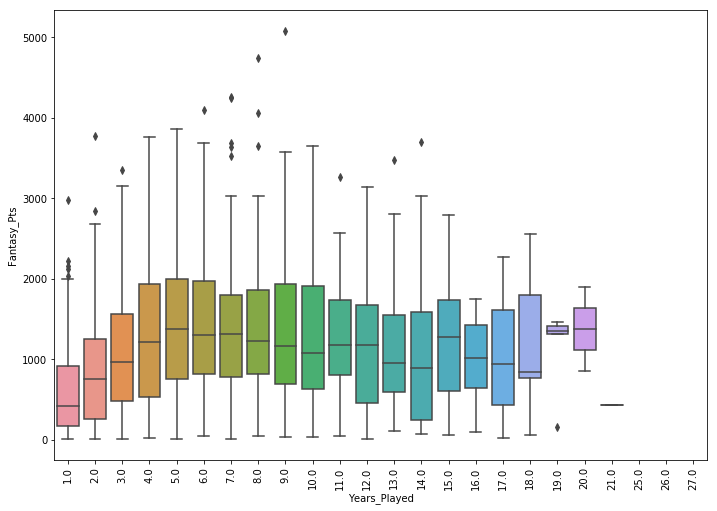

In [78]:
'''The Downside the method is that players who had the same first and last name as previous players will mess
with the experience column however since the data is so large assumed it wouldn't of made a difference 
if this was correced. '''

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation='vertical')
sns.boxplot(x=Experience['Years_Played'][Experience['Year']>=2015],y=Experience['Fantasy_Pts'][Experience['Years_Played']<=21])    

In [21]:
Value3=Experience[Experience['Years_Played']<=21].groupby('Years_Played').mean()

Text(0.5,1,'Fantasy Points vs Year in NBA')

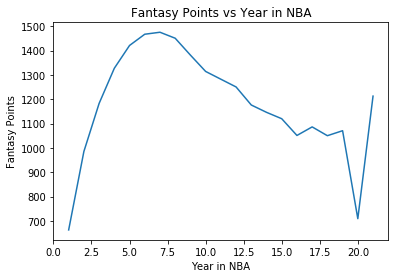

In [22]:
plt.figure()
plt.plot(Value3.index.values,Value3['Fantasy_Pts'])
plt.xlabel('Year in NBA')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs Year in NBA')

In [23]:
#Conclusion is that drafting players who are between their 5th and 10th year seems to be the best strategy for maximizing fantasy points


In [24]:
''' Ultimately want to create some type of regression model to predict fantasy statistics for upcoming nba season, 
since many of the advanced statistics can put some of the initial statistics into context it would be valuble to see 
how they actually influence the Fantasy Points system. 
    
    The reason I believe this is valuable is because advanced statistics look at percentages etc which have less variance 
due

In [25]:
'''A large pairplot from the seaborn library was used to determine which stats sort of show a positive trend. 
It was determined PER,WS/48,USG%,TS%,BPM,VORP all showed a linear trend 
'''
df2=df2[df2['Year']>=1990]
df3.sort_values(['Player','Year']).head()

,Player,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TRB,BLK,STL,TOV,3P_y,FT,FTM,TD,DD,Fantasy_Pts
148,A.C. Green,1990.0,14.7,0.548,0.057,0.459,11.5,18.4,15.1,4.6,...,712.0,50.0,66.0,116.0,13.0,278.0,92.0,0.0,27.0,2134.00
697,A.C. Green,1991.0,13.8,0.556,0.101,0.557,11.3,16.2,13.8,4.5,...,516.0,23.0,59.0,99.0,11.0,223.0,79.0,0.0,8.0,1500.25
1180,A.C. Green,1992.0,16.7,0.556,0.070,0.569,11.8,18.2,14.9,6.0,...,762.0,36.0,91.0,111.0,12.0,340.0,117.0,0.0,36.0,2334.75
1630,A.C. Green,1993.0,16.3,0.603,0.065,0.531,11.5,17.3,14.4,5.9,...,711.0,39.0,88.0,116.0,16.0,277.0,98.0,0.0,31.0,2191.50
2093,A.C. Green,1994.0,17.0,0.555,0.038,0.391,11.1,18.8,15.0,6.9,...,753.0,38.0,70.0,100.0,8.0,266.0,96.0,0.0,36.0,2387.50


In [26]:
df4=df3[['Player','Year','PER','BPM','WS/48','Fantasy_Pts']] 
df4.head()

,Player,Year,PER,BPM,WS/48,Fantasy_Pts
0,Mark Acres,1990.0,8.3,-2.0,0.047,962.75
1,Michael Adams,1990.0,15.4,1.7,0.124,2554.25
2,Mark Aguirre,1990.0,15.8,0.6,0.136,1653.00
3,Danny Ainge,1990.0,16.1,1.6,0.085,2593.75
4,Mark Alarie,1990.0,14.1,-1.0,0.079,1591.25


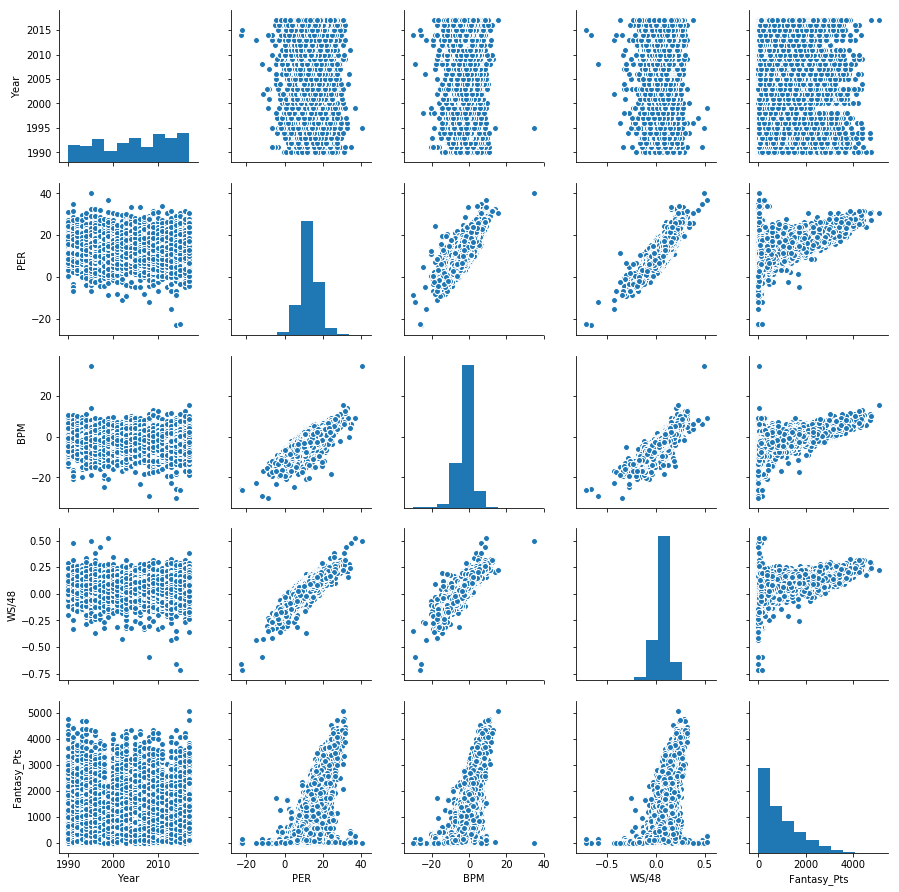

In [27]:
sns.pairplot(df4)

In [31]:
'''
The following DataFrame will be exported to an excel spreadsheet 
'''
writer = pd.ExcelWriter('Fantasy_ML.xlsx')
df4.to_excel(writer,'Sheet1')
writer.save()

In [37]:
'''
CONCLUSIONS: Centers seem to have the most value for fantasy points, players who are in their 7,8,9th years seem
to perform better and are of more value. It is also important to note years 6 and 9 tend to be high point getters
could be due to contract years. 
'''

'\nCONCLUSIONS: Centers seem to have the most value for fantasy points, players who are in their 7,8,9th years seem\nto perform better and are of more value. It is also important to note years 6 and 9 tend to be high point getters\ncould be due to contract years. \n'

In [26]:
df5=df3[['Player', 'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P_x', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%','Fantasy_Pts']]


In [39]:
#Looking at Correlation Between Fantasy Points and some statistics
df5.corr()['Fantasy_Pts'][df5.corr()['Fantasy_Pts']>0.60]

PER            0.631828
OWS            0.773770
DWS            0.760226
WS             0.846141
BPM            0.644086
VORP           0.763644
FG             0.890554
FGA            0.881135
2P             0.860982
2PA            0.857475
Fantasy_Pts    1.000000
Name: Fantasy_Pts, dtype: float64

In [40]:
df5.corr()['BPM']

Year          -0.010754
PER            0.794506
TS%            0.647053
3PAr          -0.019355
FTr            0.102649
ORB%           0.120508
DRB%           0.218215
TRB%           0.201564
AST%           0.206910
STL%           0.278905
BLK%           0.187131
TOV%          -0.205795
USG%           0.069761
OWS            0.657871
DWS            0.644542
WS             0.718394
WS/48          0.855383
OBPM           0.855861
DBPM           0.598762
BPM            1.000000
VORP           0.724993
FG             0.607196
FGA            0.588207
FG%            0.567087
3P_x           0.412407
3PA            0.413263
3P%            0.171067
2P             0.566044
2PA            0.546267
2P%            0.484906
eFG%           0.611801
Fantasy_Pts    0.644086
Name: BPM, dtype: float64

In [27]:
df5.corr()['Fantasy_Pts']

Year          -0.082615
PER            0.631828
TS%            0.386314
3PAr          -0.143867
FTr            0.112777
ORB%           0.066427
DRB%           0.195716
TRB%           0.160735
AST%           0.216213
STL%           0.045595
BLK%           0.136398
TOV%          -0.149721
USG%           0.338751
OWS            0.773770
DWS            0.760226
WS             0.846141
WS/48          0.512633
OBPM           0.599121
DBPM           0.311285
BPM            0.644086
VORP           0.763644
FG             0.890554
FGA            0.881135
FG%            0.366695
3P_x           0.493447
3PA            0.510718
3P%            0.078170
2P             0.860982
2PA            0.857475
2P%            0.282337
eFG%           0.326220
Fantasy_Pts    1.000000
Name: Fantasy_Pts, dtype: float64

In [33]:
Experience

,index,Player,Years_Played,Year,Pos,PTS,AST,TRB,BLK,STL,TOV,3P,FT,FTM,TD,DD,Fantasy_Pts
0,0,A.C. Green,6.0,1990.0,PF,1061.0,90.0,712.0,50.0,66.0,116.0,13.0,278.0,92.0,0.0,27.0,2134.00
1,1,A.C. Green,7.0,1991.0,PF,750.0,71.0,516.0,23.0,59.0,99.0,11.0,223.0,79.0,0.0,8.0,1500.25
2,2,A.C. Green,8.0,1992.0,PF,1116.0,117.0,762.0,36.0,91.0,111.0,12.0,340.0,117.0,0.0,36.0,2334.75
3,3,A.C. Green,9.0,1993.0,PF,1051.0,116.0,711.0,39.0,88.0,116.0,16.0,277.0,98.0,0.0,31.0,2191.50
4,4,A.C. Green,10.0,1994.0,PF,1204.0,137.0,753.0,38.0,70.0,100.0,8.0,266.0,96.0,0.0,36.0,2387.50
5,5,A.C. Green,11.0,1995.0,SF,916.0,127.0,669.0,31.0,55.0,114.0,43.0,251.0,92.0,0.0,22.0,1941.00
6,6,A.C. Green,12.0,1996.0,SF,612.0,72.0,554.0,23.0,45.0,79.0,14.0,168.0,69.0,0.0,20.0,1391.75
7,7,A.C. Green,13.0,1997.0,PF,597.0,69.0,656.0,16.0,70.0,74.0,1.0,128.0,69.0,0.0,16.0,1489.75
8,8,A.C. Green,14.0,1998.0,PF,600.0,123.0,668.0,27.0,78.0,68.0,0.0,116.0,46.0,0.0,14.0,1650.50
9,9,A.C. Green,15.0,1999.0,PF,246.0,25.0,228.0,8.0,28.0,19.0,0.0,30.0,22.0,0.0,4.0,575.50


In [35]:
df2.columns

Index(['Player', 'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%'],
      dtype='object')

In [82]:
Experience.to_csv(r'data-files/fantasy_stats.csv')